In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb #Nhớ cài pip install seaborn trước trong terminal rồi mới xài

In [2]:
tips = sb.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


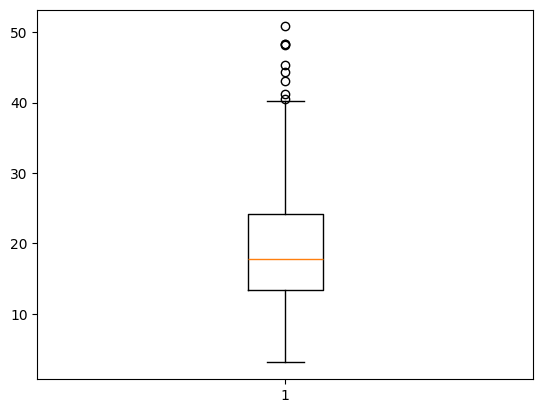

In [5]:
plt.boxplot(tips.total_bill); #Vẽ boxplot cho cột total_bill trong tips

In [8]:
tips.total_bill.describe() #Xem các thống kê mô tả của total_bill rồi đối chiếu với boxplot

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [9]:
Q3 = tips.total_bill.quantile(0.75)
Q1 = tips.total_bill.quantile(0.25)

In [10]:
#Tính interquantile range = IQR = quantile3(75%) - quantile1(25%)
IQR = Q3 - Q1
IQR

10.779999999999998

In [11]:
#Tính giá trị còi trên upper whisker
upper_whisker = Q3 +IQR*1.5
upper_whisker

40.29749999999999

In [12]:
#Tính ra giá trị còi dưới lower whisker
lower_whisker = Q1-IQR*1.5
lower_whisker #Nhận thấy do IQR lớn quá, nên khi trừ ra thì lower_whisker < 0, do đó phải dò lấy giá trị lớn hơn Q1 để tính lại

-2.8224999999999945

In [13]:
#Những giá trị nào > upper_whisker hoặc < lower_whisker sẽ được coi là giá trị ngoại lệ (outliers)
tips[tips.total_bill > upper_whisker]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


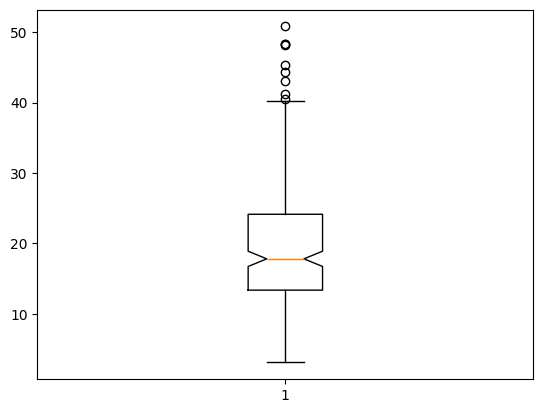

In [14]:
plt.boxplot(tips.total_bill, notch=True); #Thêm notch=True để vẽ boxplot chích eo
                                          #Cái eo đấy là khoảng tin cậy 95% của giá trị mean của dữ liệu

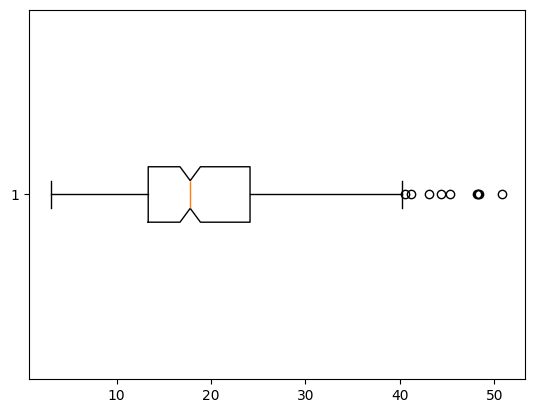

In [15]:
plt.boxplot(tips.total_bill, notch=True, vert=False); #Chỉnh vert=False để vẽ boxplot nằm ngang